In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from number_recognition_network import *

In [2]:
df_pd = pd.read_csv('train.csv')
df = np.array(df_pd)
m, n = df.shape

print("Images:", m, "\nPixels:", n-1)

Images: 42000 
Pixels: 784


In [3]:
# Each column is an entry, rows are features.

test_set = df[0:1000].T
X_test, y_test = test_set[1:n]/255, test_set[0]

print(X_test.shape, y_test.shape)

(784, 1000) (1000,)


In [4]:
# Each column is an entry, rows are features.

training_set = df[1000:m].T
X_train, y_train = training_set[1:n]/255, training_set[0]

print(X_train.shape, y_train.shape)

(784, 41000) (41000,)


Eample No:    2265/41000
Known Label:  1


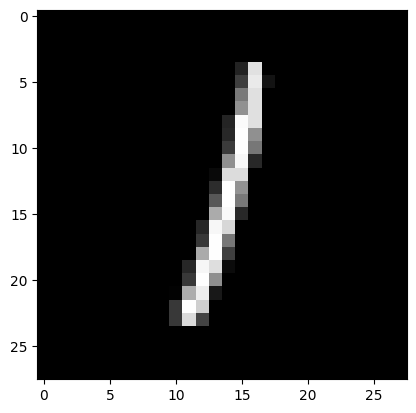

In [5]:
index = np.random.randint(0, X_train.shape[1])
image = X_train[:, index, None]
label = y_train[index]

print("Eample No:   ", f"{index}/{y_train.size}")
print("Known Label: ", label)

plt.imshow(image.reshape((28, 28)), interpolation='nearest')
plt.gray()
plt.show()

In [6]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

In [7]:
n_hidden = 128
lr = 0.1
n_iters = 2048

weight_layer_1, bias_layer_1, weight_layer_2, bias_layer_2, training_log = gradient_descent(
                                                                                        X=X_train,
                                                                                        y=y_train,
                                                                                        n_hidden=n_hidden,
                                                                                        lr=lr,
                                                                                        n_iters=n_iters)

Iteration    0 | Loss: 2.3644 | Train Score: 0.1072
Iteration  100 | Loss: 0.4530 | Train Score: 0.8830
Iteration  200 | Loss: 0.3553 | Train Score: 0.9022
Iteration  300 | Loss: 0.3147 | Train Score: 0.9118
Iteration  400 | Loss: 0.2892 | Train Score: 0.9185
Iteration  500 | Loss: 0.2699 | Train Score: 0.9244
Iteration  600 | Loss: 0.2543 | Train Score: 0.9290
Iteration  700 | Loss: 0.2410 | Train Score: 0.9325
Iteration  800 | Loss: 0.2294 | Train Score: 0.9356
Iteration  900 | Loss: 0.2189 | Train Score: 0.9383
Iteration 1000 | Loss: 0.2093 | Train Score: 0.9412
Iteration 1100 | Loss: 0.2006 | Train Score: 0.9440
Iteration 1200 | Loss: 0.1926 | Train Score: 0.9463
Iteration 1300 | Loss: 0.1851 | Train Score: 0.9485
Iteration 1400 | Loss: 0.1782 | Train Score: 0.9505
Iteration 1500 | Loss: 0.1718 | Train Score: 0.9523
Iteration 1600 | Loss: 0.1657 | Train Score: 0.9538
Iteration 1700 | Loss: 0.1601 | Train Score: 0.9553
Iteration 1800 | Loss: 0.1548 | Train Score: 0.9572
Iteration 19

In [8]:
pd.DataFrame(training_log).head()

,train_loss,train_acc
0,2.364410,0.107171
1,0.452986,0.883000
2,0.355314,0.902195
3,0.314708,0.911780
4,0.289160,0.918463


In [9]:
pd.DataFrame(training_log).tail()

,train_loss,train_acc
16,0.165718,0.953829
17,0.160068,0.955268
18,0.154789,0.957171
19,0.149852,0.958390
20,0.145226,0.960122


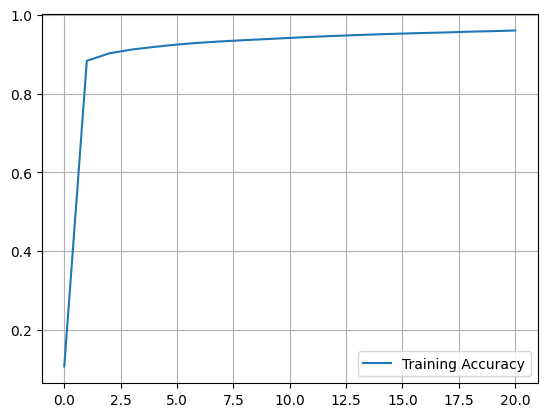

In [10]:
t=(range(0,len(training_log['train_acc'])))
plt.plot(t, training_log['train_acc'], label='Training Accuracy')
plt.legend()
plt.grid()
plt.show()

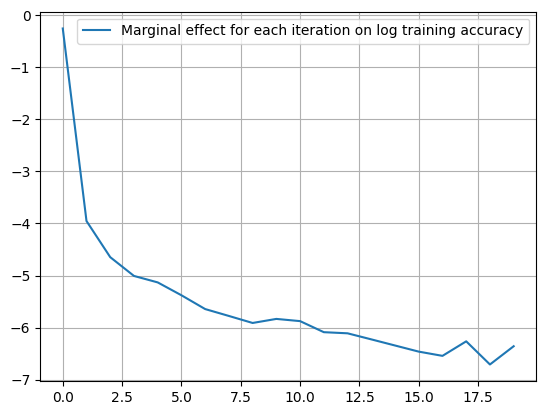

In [11]:
dydx_t = range(len(training_log['train_acc']) - 1)
dydx_acc = [training_log['train_acc'][i+1] - training_log['train_acc'][i] 
            for i in dydx_t]

plt.plot(dydx_t, np.log(dydx_acc), label='Marginal effect for each iteration on log training accuracy')
plt.legend()
plt.grid()
plt.show()

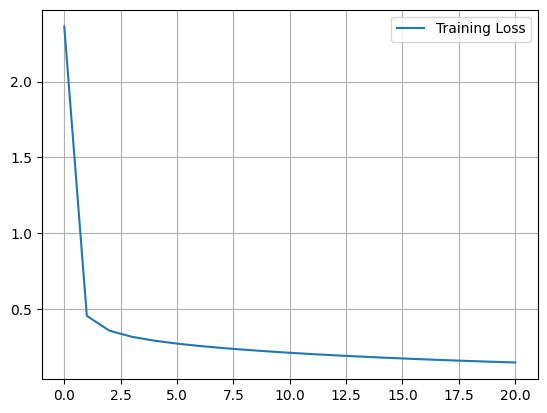

In [12]:
plt.plot(t, training_log['train_loss'], label="Training Loss")
plt.legend()
plt.grid()
plt.show()

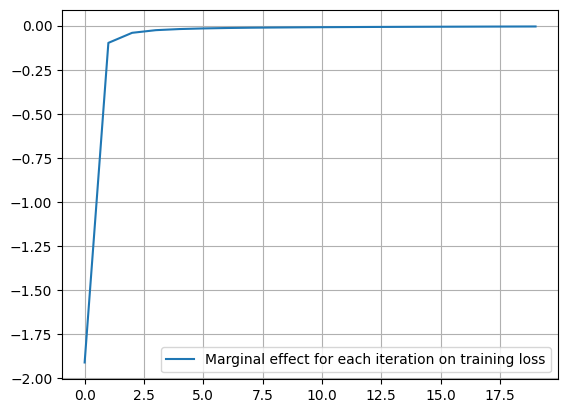

In [13]:
dydx_t = range(len(training_log['train_loss']) - 1)
dydx_loss = [training_log['train_loss'][i+1] - training_log['train_loss'][i] 
            for i in dydx_t]

plt.plot(dydx_t, dydx_loss, label='Marginal effect for each iteration on training loss')
plt.legend()
plt.grid()
plt.show()

In [14]:
'''Training Score'''

_, _, _, A2 = forward_prop(weight_layer_1, bias_layer_1, weight_layer_2, bias_layer_2, X_train)
y_prediction = predict(A2)
score(y_prediction, y_train)

0.9604634046554565

In [15]:
'''Test score'''

_, _, _, A2 = forward_prop(weight_layer_1, bias_layer_1, weight_layer_2, bias_layer_2, X_test)
y_prediction = predict(A2)
score(y_prediction, y_test)

0.9540000557899475

Eample No:         20571/41000
Known Label:       0
Model Prediction:  0
Prediction:        True
Confidence:        High: 95.05%

Network Reasoning
0    95.050003
6     4.890000
5     0.050000
8     0.010000
1     0.000000
2     0.000000
4     0.000000
3     0.000000
7     0.000000
9     0.000000


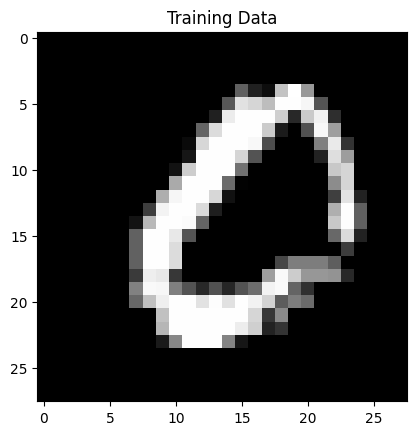

In [16]:
'''Predicting random number from the training set'''

index = np.random.randint(0, X_train.shape[1])
image = X_train[:, index, None]
label = y_train[index]

_, _, _, A2 = forward_prop(weight_layer_1, bias_layer_1, weight_layer_2, bias_layer_2, image)
prediction = predict(A2)

A2_np = A2.flatten().detach().cpu().numpy()       # for pandas
image_np = image.detach().cpu().numpy()           # for matplotlib
label_np = label.detach().cpu().item()            # scalar label
prediction_np = prediction.detach().cpu().item()  # scalar prediction

confidence = pd.Series(A2_np)
levels = {
    0.9: "High",
    0.7: "Moderate",
    0.5: "Low",
    0.0: "Not Significant",
}
conf_level = [levels[threshold] for threshold in levels.keys() if confidence.max() >= threshold]

print("Eample No:        ", f"{index}/{y_train.detach().cpu().numpy().size}")
print("Known Label:      ", label_np)
print("Model Prediction: ", prediction_np)
print("Prediction:       ", prediction_np==label_np)
print(f"Confidence:        {conf_level[0]}: {confidence.max():.2%}")
print(f"\nNetwork Reasoning\n{round(confidence*100,2).sort_values(ascending=False).to_string()}")
plt.title("Training Data")
plt.imshow(image_np.reshape((28, 28)) * 255, interpolation='nearest')
plt.gray()
plt.show()

Eample No:         434/1000
Known Label:       5
Model Prediction:  6
Prediction:        False
Confidence:        Moderate: 83.71%

Network Reasoning
6    83.709999
5    14.470000
2     1.270000
8     0.230000
3     0.120000
0     0.120000
1     0.060000
4     0.000000
7     0.000000
9     0.000000


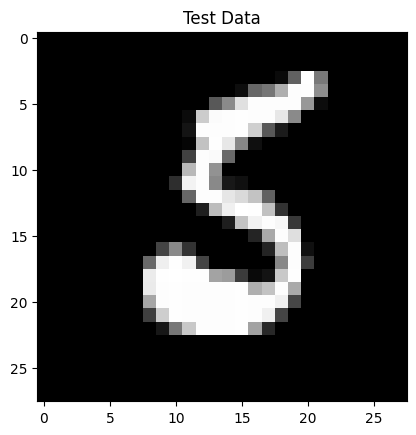

In [26]:
'''Predicting random number from the test set'''

index = np.random.randint(0, X_test.shape[1])
image = X_test[:, index, None]
label = y_test[index]

_, _, _, A2 = forward_prop(weight_layer_1, bias_layer_1, weight_layer_2, bias_layer_2, image)
prediction = predict(A2)

A2_np = A2.flatten().detach().cpu().numpy()       # for pandas
image_np = image.detach().cpu().numpy()           # for matplotlib
label_np = label.detach().cpu().item()            # scalar label
prediction_np = prediction.detach().cpu().item()  # scalar prediction

confidence = pd.Series(A2_np)
levels = {
    0.9: "High",
    0.7: "Moderate",
    0.5: "Low",
    0.0: "Not Significant",
}
conf_level = [levels[threshold] for threshold in levels.keys() if confidence.max() >= threshold]

print("Eample No:        ", f"{index}/{y_test.detach().cpu().numpy().size}")
print("Known Label:      ", label_np)
print("Model Prediction: ", prediction_np)
print("Prediction:       ", prediction_np==label_np)
print(f"Confidence:        {conf_level[0]}: {confidence.max():.2%}")
print(f"\nNetwork Reasoning\n{round(confidence*100,2).sort_values(ascending=False).to_string()}")
plt.title("Test Data")
plt.imshow(image_np.reshape((28, 28)) * 255, interpolation='nearest')
plt.gray()
plt.show()